# Machine Learning Engineer Nanodegree
## P5: Capstion Project
## Di-Tech Competition

## Background

> [Di-Tech Competition](http://research.xiaojukeji.com/competition/detail.action?competitionId=DiTech2016) 

> As less than 10% of China’s 1.4 billion citizens own automobiles, the frequency at which Chinese citizens commute on taxis, buses, trains, and planes is the highest in the world. Didi Chuxing, the dominant ride-hailing company in China, processes over 11 million trips, plans over 9 billion routes and collects over 50TB of data per day. To meet needs of riders, Didi must continually innovate to improve cloud computing and big data technologies and algorithms in order to process this massive amount of data and uphold service reliability.

>Supply-demand forecasting is critical to enabling Didi to maximise utilisation of drivers and ensure that riders can always get a car whenever and wherever they may need a ride. Supply-demand forecasting helps to predict the volume of drivers and riders at a certain time period in a specific geographic area. For instance, demand tends to surge in residential areas in the mornings and in business districts in the evenings. Supply-demand forecasting allows Didi to predict demand surges and guide drivers to those areas. The end result is higher earnings for drivers and no surge pricing for riders!

## Definition and Evaluation Criteria

### Definition

<script type="text/javascript" src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-MML-AM_CHTML"></script>


A passenger calls a ride(request)by entering the place of origin and destination and clicking “Request Pickup” on the Didi app. A driver answers the request (answer) by taking the order.

Didi divides a city into $n$ non-overlapping square districts $D={d_1,d_2,⋯,d_n}$ and divides one day uniformly into 144 time slots $t_1, t_2,..., t_{144}$, each 10 minutes long.
In district $d_i$, and time slot $t_j$> , the number of passengers' requests is denoted as $r_{ij}$, and drivers' answers as $a_{ij}$ .

In district $d_i$, and time slot $t_j$, the demand is denoted as $demand_{ij}$=$r_{ij}$ and the supply as $supply_{ij}$=$a_{ij}$, and the demand supply gap is: $gap_{ij}：gap_{ij} = r_{ij}- a_{ij}$ Given the data of every district and time slot $t_j, t_{j-1}$, you need to predict $gap_{i,j+1}, ∀d_i ∈ D$.

### Evaluation Metrics
Consider $d_i$ districts and $t_j$ time slots, and the supply-demand gap $gap_{ij}$ , and your prediction is $s_{ij}$, we use as the evaluation metrics:

$$MAPE=\frac{1}{n}\sum_{d_i}^{ }(\frac{1}{q}\sum_{t_j}^{ }|\frac{gap_{ij}-s_{ij}}{gap_{ij}}|),  \forall gap_{ij}>0 $$ 

The lowest MAPE will be the best.

### Format of results
The result you submitted needs to be in the following format: district ID, time slot, prediction value. For example:

>1,2016-01-23-1,30.0<br>
1,2016-01-23-4,5.0<br>
1,2016-01-23-10,6.0<br>
2,2016-01-23-1,30.0<br>
2,2016-01-23-4,5.0<br>

The detailed description of each field is as follows:

|Data name       |Data type|Example                                             |
|:--------------:|:-------:|:--------------------------------------------------:|
|District ID     |string   |1,2,3,4 (the same as district mapping ID)           |
|Time slot       |string   |2016-01-23-1 (The first time slot on Jan. 23rd, 2016|
|Prediction value|double   |6.0                                                 |

*Note:one day is uniformly divided into 144 ten minute time slots*

## Analysis

### Data Exploration
The <i>training set</i> contains three consecutive weeks of data for City M in 2016, and you need to forecast the supply-demand gap for a certain period in the fourth and fifth weeks of City M. The <i>test set</i> contains the data of half an hour before the predicted time slot. The specific time slots where you need to predict the supply-demand gap are shown in the explanation document in the test set.

The Order Info Table, Weather Info Table and POI Info Table are available in the database, while the District Definition Table and Traffic Jam Info Table are derived from other tables in the database. All sensitive data has been anonymised.

#### Order Info Table

|Field	|Type	|Meaning	|Example|
|:-----:|:-----:|:---------:|:-----:|
|order_id|	string|	order ID|	70fc7c2bd2caf386bb50f8fd5dfef0cf|
|driver_id|	string|	driver ID|	56018323b921dd2c5444f98fb45509de|
|passenger_id|	string|	user ID|	238de35f44bbe8a67bdea86a5b0f4719|
|start_district_hash|	string|	departure	|d4ec2125aff74eded207d2d915ef682f|
|dest_district_hash|	string|	destination|	929ec6c160e6f52c20a4217c7978f681|
|Price|	double|	Price|	37.5|
|Time|	string	|Timestamp of the order|	2016-01-15 00:35:11|

The Order Info Table shows the basic information of an order, including the passenger and the driver (if driver_id =NULL, it means the order was not answered by any driver), place of origin, destination, price and time. The fields order_id, driver_id, passenger_id, start_hash, and dest_hash are made not sensitive.

#### District Info Table

|Field|	Type	|Meaning|	Example|
|:--:|:--:|:--:|:--:|
|district_hash	|string	|District hash|	90c5a34f06ac86aee0fd70e2adce7d8a|
|district_id	|string	|District ID|	1|

The District Info Table shows the information about the districts to be evaluated in the contest. You need to do the prediction given the districts from the District Definition Table. In the submission of the results, you need to map the district hash value to district mapped ID.

#### POI Information Table

|Field|	Type|	Meaning	|Example|
|:----:|:----:|:----:|:----:|
|district_hash|	string	|District hash|	74c1c25f4b283fa74a5514307b0d0278|
|poi_class	|string	|POI class and its number|	1#1:41 2#1:22 2#2:32|

The POI Info Table shows the attributes of a district, such as the number of different facilities. For example, 2#1:22 means in this district, there are 22 facilities of the facility class 2#1. 2#1 means the first level class is 2 and the second level is 1, such as entertainment#theater, shopping#home appliance, sports#others. Each class and its number is separated by \t.

#### Traffic Jam Info Table

|Field|	Type|	Meaning|	Example|
|:----:|:----:|:----:|:----:|
|district_hash	|string|	Hash value of the district|	1ecbb52d73c522f184a6fc53128b1ea1|
|tj_level|	string|	Number of road sections at different congestion levels|	1:231 2:33 3:13 4:10|
|tj_time|	string|	Timestamp	|2016-01-15 00:35:11|

The Traffic Jam Info Table shows the overall traffic status on the road in a district, including the number of roads at different traffic jam levels in different time periods and different districts. Higher values mean heavier traffic.

#### Weather Info Table

|Field|	Type|	Meaning|	Example|
|:----:|:----:|:----:|:----:|
|Time	|string	|Timestamp|	2016-01-15 00:35:11|
|Weather|	int|	Weather|	7|
|temperature|	double|	Temperature|	-9|
|PM2.5	|double|	pm25|	66|

The Weather Info Table shows the weather info every 10 minutes each city. The weather field gives the weather conditions such as sunny, rainy, and snowy etc; all sensitive information has been removed. The unit of temperature is Celsius degree, and PM2.5 is the level of air pollutions.

#### Preliminary Ideas
- The `Time` format in the dataset is not meet with the prediction fromat(i.e. time slot), they should be transfered into the correct format.
- The week information should be added in the dataset, becasue the demand would be very different between workday and weekend.

### Exploratory Visualization

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Show matplotlib plots inline
%matplotlib inline

# Load the data path
mode_flag = True
if mode_flag == True:
    LOAD_DATA_DIR = "season_1/training_data/"
    SAVE_DATA_DIR = "season_1_data/training_data/"
else:
    LOAD_DATA_DIR = "season_1/test_set_1/"
    SAVE_DATA_DIR = "season_1_data/test_data/"
    
# All the data dirs
CLUSTER_MAP_SHEET_DIR = "cluster_map"
ORDER_SHEET_DIR = "order_data"
TRAFFIC_SHEET_DIR = "traffic_data"
WEATHER_SHEET_DIR = "weather_data"
POI_SHEET_DIR = "poi_data"

In [110]:
# Load order data 
def order_data():
    order_sheet_path = os.path.join(LOAD_DATA_DIR, ORDER_SHEET_DIR)
    save_path = os.path.join(SAVE_DATA_DIR, ORDER_SHEET_DIR)
    data_gaps = []
    days = []
    for file in os.listdir(order_sheet_path):
        data = pd.read_csv(os.path.join(order_sheet_path, file), header = -1, delimiter='\t')
        data.columns = ["order_id", "driver_id", "passenger_id", "start_district_hash", 
                        "dest_district_hash", "Price","Time"]
        data_gap = data.count()['order_id'] - data.count()['driver_id']
        data_gaps.append(data_gap)
        days.append(file[19:])
    return data_gaps, days
gap, day = order_data()

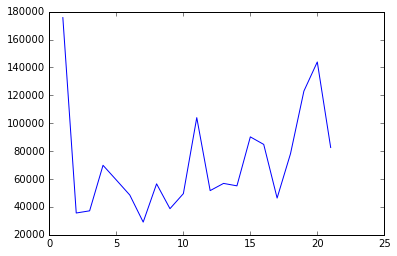

In [112]:
plt.plot(day,gap);

In [173]:
# Load poi data
def poi_data():
    return None

# Load cluster data
def cluster_data():
    cluster_map_sheet_path = os.path.join(LOAD_DATA_DIR, CLUSTER_MAP_SHEET_DIR)
    save_path = os.path.join(SAVE_DATA_DIR, CLUSTER_MAP_SHEET_DIR)
    file = "cluster_map"
    data = pd.read_csv(os.path.join(cluster_map_sheet_path, file), header = -1, delimiter='\t')
    data.columns = ["district_hash", "district_id"]
    return data

cluster_data = cluster_data()
cluster_data.head()

,district_hash,district_id
0,90c5a34f06ac86aee0fd70e2adce7d8a,1
1,f2c8c4bb99e6377d21de71275afd6cd2,2
2,58c7a4888306d8ff3a641d1c0feccbe3,3
3,b26a240205c852804ff8758628c0a86a,4
4,4b9e4cf2fbdc8281b8a1f9f12b80ce4d,5


In [4]:
# Load the 2016-01-01 data, visulization
order_sheet_path = os.path.join(LOAD_DATA_DIR, ORDER_SHEET_DIR)
save_path = os.path.join(SAVE_DATA_DIR, ORDER_SHEET_DIR)

order_01 = pd.read_csv(os.path.join(save_path, "order_data_2016-01-01.csv"))
order_01.head(3)

NameError: name 'os' is not defined

In [1]:
order_01[:2]

NameError: name 'order_01' is not defined

In [176]:
full_order = order_01.merge(cluster_data, left_on='start_district_hash', right_on='district_hash')


full_order['Resp'] = full_order['driver_id'].notnull()

small_order = full_order.loc[:, ['date', 'time', 'week','district_id', 'Price', 'Resp']]
#small_order_file = os.path.join(base_name, f + ".csv")
#small_order.to_csv(small_order_file, index = False)
#print time.time() - prev
small_order[30:35]

,date,time,week,district_id,Price,Resp
30,2016-01-01,96,5,23,18.9,True
31,2016-01-01,110,5,23,13.0,True
32,2016-01-01,18,5,23,31.0,True
33,2016-01-01,61,5,23,8.7,False
34,2016-01-01,108,5,23,13.9,True


In [187]:
group_all = small_order.loc[:, ['district_id', 'date', 'time', 'week','Resp']].groupby(['district_id', 'date', 'week','time'])
sd_data = group_all.count()
sd_data['supply'] = group_all.Resp.sum()
sd_data['gap'] = sd_data.Resp - sd_data.supply
sd_data.columns = ['demand', 'supply', 'gap']

sd_df = sd_data.reset_index(level = ['district_id', 'date', 'week','time'])


In [188]:
sd_data[140:150]

demand  supply  gap
district_id date       week time                     
1           2016-01-01 5    141      113   112.0  1.0
                            142      115   111.0  4.0
                            143       90    89.0  1.0
                            144       84    82.0  2.0
2           2016-01-01 5    1          9     8.0  1.0
                            2         19    19.0  0.0
                            3         13    13.0  0.0
                            4         10    10.0  0.0
                            5         11    11.0  0.0
                            6         16    16.0  0.0

In [189]:
sd_df.head()

,district_id,date,week,time,demand,supply,gap
0,1,2016-01-01,5,1,187,178.0,9.0
1,1,2016-01-01,5,2,198,191.0,7.0
2,1,2016-01-01,5,3,192,182.0,10.0
3,1,2016-01-01,5,4,172,167.0,5.0
4,1,2016-01-01,5,5,153,152.0,1.0


In [194]:
# Load the 2016-01-01 data, visulization weather
traffic_sheet_path = os.path.join(LOAD_DATA_DIR, TRAFFIC_SHEET_DIR)
save_path = os.path.join(SAVE_DATA_DIR, TRAFFIC_SHEET_DIR)

traffic_01 = pd.read_csv(os.path.join(save_path, "traffic_data_2016-01-01.csv"))

In [204]:
cluster_traffic = traffic_01.merge(cluster_data, left_on='district_hash', right_on='district_hash')
simplified_traffic = cluster_traffic.drop('district_hash',axis=1)
simplified_traffic[:2]

,tj_level1_count,tj_level2_count,tj_level3_count,tj_level4_count,week,date,time,district_id
0,231,33,13,10,5,2016-01-01,142,66
1,305,69,13,16,5,2016-01-01,56,66


### Algorithms and Techniques

### Benchmark

## Methodology
### Data Preprocessing
- Transfer the data format into `time slot` format
- Calculate the `weekday` info based on `Time` info
- Calculate the gap info in each `time slot` and `district_id` based on `order` info 
- Get the weather info with `time slot` and `district_id` index
- Get the traffic info with `time slot` and `district_id`index
- Merge these data sheets into one, which concludes `gap`, `weather`, `traffic`, and `weekday` with `time slot` and `district_id` index.
- Input: `time slot`, and `distric_id`. Output: `gap`.

**Time slot **<br>
`time_slice = pd.to_datetime(data.Time, unit='s')`<br>
`time_slice.map(lambda x: x.hour * 6 + x.minute /10 + 1)`<br>
**Weekday**<br>
`time_slice.map(lambda x: x.isoweekday())`<br>
**Implementation code**<br>
 `main_data_preprocessing.order_sheet_info_pre()`<br>
 

### Implementation

### Refinement

## Getting Started

In [61]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load test.csv
test = pd.read_csv('season_1/test.csv',header=None)

## Load Data

### Order Info Load Test

In [5]:
order_1 = pd.read_csv('season_1/training_data/order_data/order_data_2016-01-01', 
                      delimiter='\t',header=None)
order_1.columns = ["order_id", "driver_id","passenger_id","start_district_hash", 
                   "dest_district_hash", "Price","Time"]

In [6]:
order_1.head(2)

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54


In [8]:
order_1.sort_values('Time')

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,Price,Time
262258,9a864e958859b506f5f8bee9d8dfff17,a323121d71cd5247f38a4848c2039cb1,b9bd961ee676441d64c8748aa18efcda,b05379ac3f9b7d99370d443cfd5dcc28,52d7b69796362a8ed1691a6cc02ddde4,45.0,2016-01-01 00:00:03
231406,6732f74a5a59353cddb421ceb39f7c26,a57d4acc407006cbb4086f0cc60d2575,37e17d1ec5ca26d52be702ce74db64a6,4725c39a5e5f4c188d382da3910b3f3f,929ec6c160e6f52c20a4217c7978f681,18.0,2016-01-01 00:00:04
210341,f4beb0739bcee0f040385d69b9809b92,0b41511d4c63ed4bb030bd9d5ed5399e,b684445572045febd51a63a4e478b356,b05379ac3f9b7d99370d443cfd5dcc28,4725c39a5e5f4c188d382da3910b3f3f,31.0,2016-01-01 00:00:04
323063,7014d22c8de112d8654d0c4467f70d07,ade3395070bf81f4bcf0331d91853ef8,2d666c88b9e26f85b5074425cac90dc1,4725c39a5e5f4c188d382da3910b3f3f,38d5ad2d22b61109fd8e7b43cd0e8901,57.0,2016-01-01 00:00:05
188962,7bd83a5dd61f5242f82c52075ad43cbf,f5307b86a4d3da55e3626b9048d9b54a,d6c7bb502d01aed1c5031e17957e44ec,f47f35242ed40655814bc086d7514046,1cbfbdd079ef93e74405c53fcfff8567,24.0,2016-01-01 00:00:05
268247,1f5672197a352594fb546d7164a41f28,90f993e801c394a351321377de6820b3,7d61be2772673f4fb728c867fba64833,82cc4851f9e4faa4e54309f8bb73fd7c,82cc4851f9e4faa4e54309f8bb73fd7c,10.0,2016-01-01 00:00:05
411831,e39b6a0b9c992e57c107f3af71944e98,279a8f4be81172efea4c70f24d21ce7d,ef35c1ab00ca6df9dca2c49f24e89f9b,bf44d327f0232325c6d5280926d7b37d,bf44d327f0232325c6d5280926d7b37d,3.0,2016-01-01 00:00:06
150247,1942375c76a21fc199b792944cdb4007,3cd1298e4d388e8209c5d2c5de7133fa,95a66cc3632b591760fca2b3f184392b,d4ec2125aff74eded207d2d915ef682f,d4ec2125aff74eded207d2d915ef682f,10.0,2016-01-01 00:00:06
195244,794902d68e64d9e7711d0a191ab4541c,a65d3974c6cd671418174d3e44f27ad0,f7850768683eeb232dd35cd1b442df03,74c1c25f4b283fa74a5514307b0d0278,dd8d3b9665536d6e05b29c2648c0e69a,16.0,2016-01-01 00:00:07
146611,f39ed6dcc14cfa14dc9ef456194f8dbd,0d9860761103b8447634a1c2c2221c9d,c226e83416d5a3b48a09e97093104b40,364bf755f9b270f0f9141d1a61de43ee,c9f855e3e13480aad0af64b418e810c3,16.0,2016-01-01 00:00:07


In [20]:
# order gap can be calculated as
order_gap = order_1.count()['order_id'] - order_1.count()['driver_id']
print order_gap

175710


## idea:

How to load all the data in one csv.

data = data.drop_duplicates()


In [129]:
def day_time(time):
    for i in time:
        return i
# Time slice
time_slice = pd.to_datetime(order_1.Time,unit='s')
print time_slice.head()
#order_1['week'] = time_slice.map(lambda x: x.isoweekday())
#order_1['date'] = time_slice.map(lambda x: x.date())
#time_slice.map(lambda x: x.hour * 6 + x.minute /10 + 1 )

0   2016-01-01 13:37:23
1   2016-01-01 09:47:54
2   2016-01-01 18:24:02
3   2016-01-01 22:13:27
4   2016-01-01 17:00:06
Name: Time, dtype: datetime64[ns]


In [58]:
# submit form
test.head()

,0,1,2
0,1,2016-01-22-46,0
1,2,2016-01-22-46,0
2,3,2016-01-22-46,0
3,4,2016-01-22-46,0
4,5,2016-01-22-46,0


9

### Load POI

In [45]:
poi_1 = pd.read_csv('season_1/training_data/poi_data/poi_data', 
                    error_bad_lines=False,delimiter='\t')
poi_1.head()

Skipping line 52: expected 139 fields, saw 142
Skipping line 53: expected 139 fields, saw 148
Skipping line 54: expected 139 fields, saw 142
Skipping line 62: expected 139 fields, saw 152
Skipping line 63: expected 139 fields, saw 144



,74c1c25f4b283fa74a5514307b0d0278,1#11:2241,1#10:249,24:1245,25:3652,20:33449,22:2324,23:913,4:13031,8:166,...,24#1:133713,13#4:19173,2#8:166,2#4:249,2#5:1079,2#6:1245,2#7:1826,2#1:83,2#2:9213,2#3:415
0,08f5b445ec6b29deba62e6fd8b0325a6,20#7:249,20#5:83,2#7:166,20#2:747,20#1:996,16#12:1245,16#10:2158,16#11:415,20#8:249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b7f6f4e2bf237b6cc58f57142bea5c0,4#16:249,24:913,25:332,20:4316,22:415,4:2158,5#4:83,5#3:166,5#1:332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a814069db8d32f0fa6e188f41059c6e1,1#11:498,24:332,25:581,20:5810,22:2407,4:1494,8:83,5#1:581,8#2:996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8316146a6f78cc6d9f113f0390859417,20#7:581,20#5:83,20#4:415,20#2:166,20#1:664,16#12:332,16#10:747,16#11:498,20#8:913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,693a21b16653871bbd455403da5412b4,1#11:249,25:415,20:2905,22:415,4:498,5#3:83,8#2:581,8#3:166,8#4:830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def data_per_day(day):
    """load data path of every day，
    read data of each part,
    export data."""
    # Load data path
    path = 'season_1/training_data/'
    path_order = path + 'order_data/order_data_2016-01-' + day
    path_weather = path + 'weather_data/weather_data_2016-01-' + day
    path_traffic = path + 'traffic_data/traffic_data_2016-01-' + day
    path_poi = path + 'poi_data/poi_data'
    path_cluster_map = path + 'cluster_map/cluster_map'
    
    # Load data
    
    
    

In [63]:
data = pd.read_csv(os.path.join(save_path, file), header = -1)

NameError: name 'data' is not defined